In [2]:
#libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

In [3]:
#Load the data using the pandas library
df = pd.read_csv("choco_monthly_revenue.csv", index_col = 0, parse_dates = True)
df.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


<AxesSubplot:xlabel='Month with Year'>

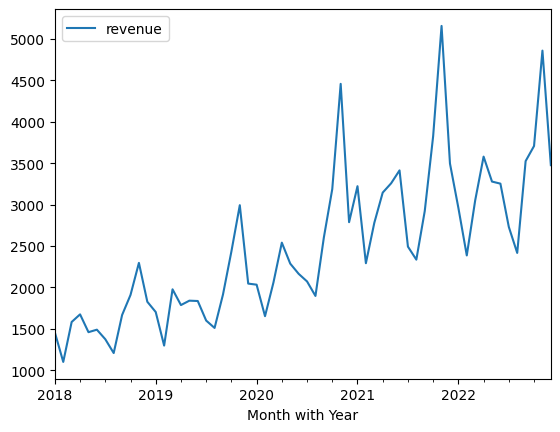

In [4]:
#Plotting the Time Series
df.plot()

In [5]:
#Checking the current Frequency of the data
df.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [6]:
#specify that the data frequency is monthly start
df = df.asfreq("MS")
df.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [7]:
#Import seasonality functions
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot

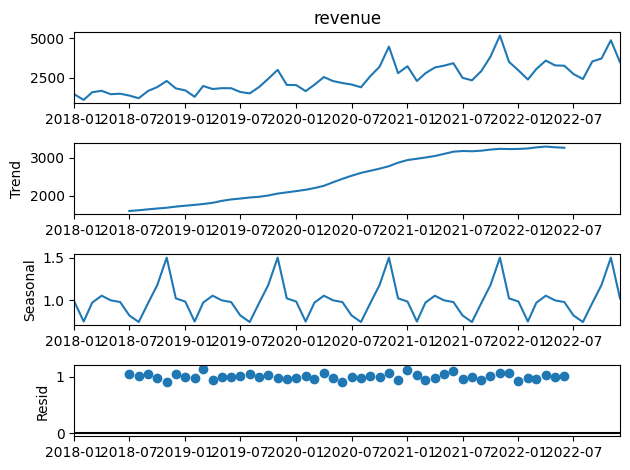

In [8]:
#Seasonal Decomposition
#since the fluctuations seem to grow overtime, the appropriate model is multiplicative
#period: 12 for monthly, 52 for weekly, 7 for daily, 4 for quarterly
decomposition = seasonal_decompose(x = df.revenue,
                                   model = 'multiplicative',
                                   period = 12)
decomposition.plot();

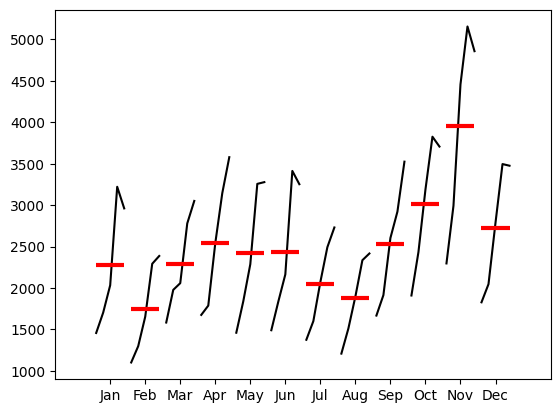

In [9]:
#Seasonal graphs
month_plot(df.revenue);

In [10]:
#Import the function to plot the auto-correlation
from statsmodels.graphics.tsaplots import plot_acf

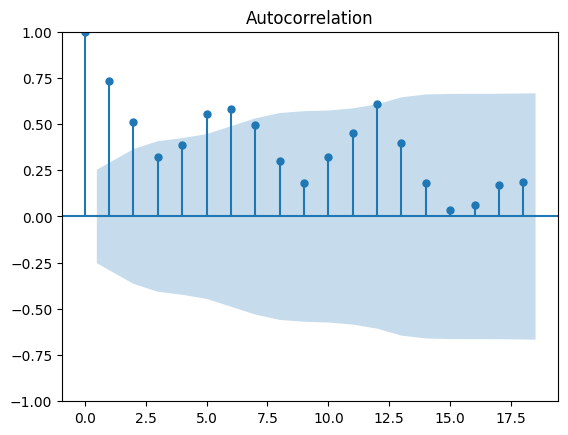

In [11]:
#Auto-correlation plot
plot_acf(df.revenue);

In [12]:
#Training and test set
test_months = 3
training = df.iloc[:-test_months, :]
test = df.iloc[-test_months:, :]
test.tail()

,revenue
Month with Year,
2022-10-01,3707
2022-11-01,4858
2022-12-01,3476


In [13]:
#forecasting model
#endog is the time series
#trend and seasonal can be either 'add' or 'mul' for additive and multiplicative
#seasonal_periods is the frequency of the data. 
model = ExponentialSmoothing(endog = training.revenue,
                             trend = 'add',
                             seasonal = 'add',
                             seasonal_periods = 12).fit()

In [14]:
#predictions
#steps is the forecasting horizon. 
#The series is optionally renamed to HW to improve the visualization afterward
predictions = model.forecast(steps = len(test)).rename("HW")
predictions.head()

2022-10-01    3818.356884
2022-11-01    4662.135368
2022-12-01    3511.137929
Freq: MS, Name: HW, dtype: float64

<AxesSubplot:xlabel='Month with Year'>

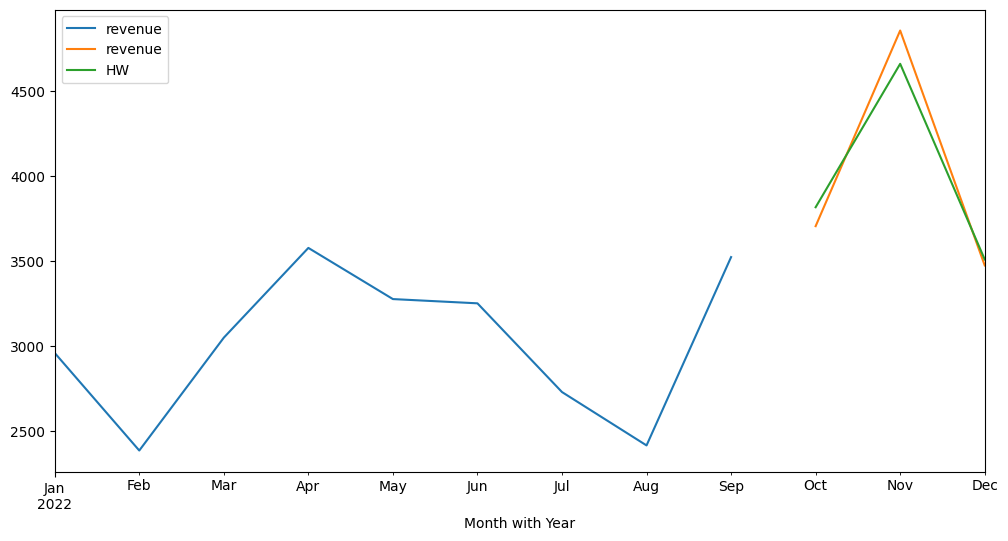

In [15]:
#visualization
#Customize the plot size with the figsize parameter to improve the visualization
#Set legend = True to include a legend of the line graphs
training['revenue']['2022-01-01':].plot(figsize = (12,6), legend = True)
test['revenue'].plot(legend = True)
predictions.plot(legend = True)

In [16]:
#Import functions MAE and MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
#Assessing accuracy with the MAE and RMSE
print(mean_absolute_error(test['revenue'], predictions))
print(mean_squared_error(test['revenue'], predictions, squared = False))

114.11981493768523
131.65356522526915


In [18]:
#forecasting model with the complete time series
#endog is the time series
#trend and seasonal can be either 'add' or 'mul' for additive and multiplicative
#seasonal_periods is the frequency of the data. 
model_final = ExponentialSmoothing(endog = df.revenue,
                             trend = 'add',
                             seasonal = 'add',
                             seasonal_periods = 12).fit()

In [19]:
#predictions
#steps is the forecasting horizon. 
#The series is optionally renamed to HW to improve the visualization afterward
predictions_final = model_final.forecast(steps = 3).rename("HW")
predictions_final.head()

2023-01-01    3463.911127
2023-02-01    2898.055761
2023-03-01    3456.992677
Freq: MS, Name: HW, dtype: float64

<AxesSubplot:xlabel='Month with Year'>

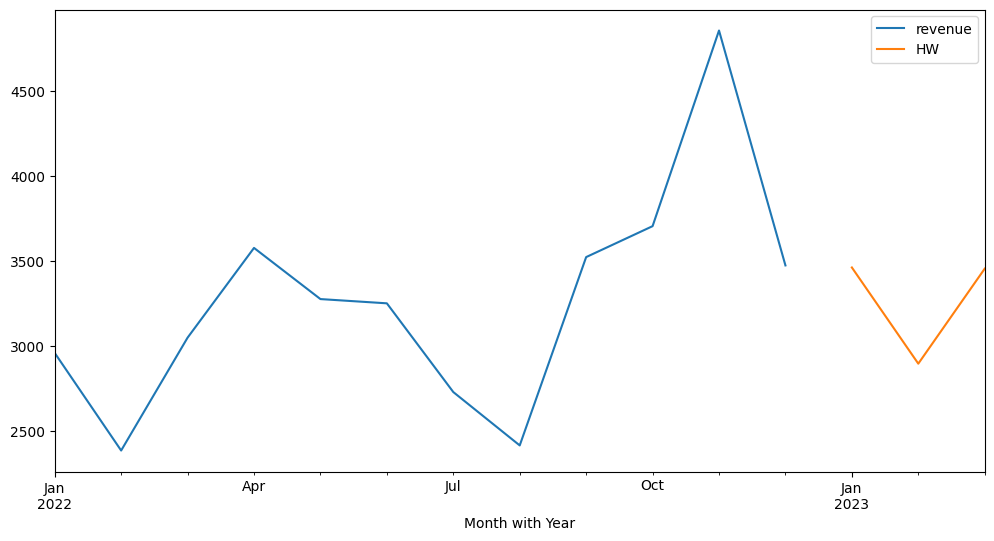

In [20]:
#visualization
#Customize the plot size with the figsize parameter to improve the visualization
#Set legend = True to include a legend of the line graphs
df['revenue']['2022-01-01':].plot(figsize = (12,6), legend = True)
predictions_final.plot(legend = True)

In [21]:
#Compute the growth expected for Q1 2023
predictions_final.sum() / df['revenue']['2022-01-01':'2022-03-01'].sum() - 1

0.16906293189379173